<a href="https://colab.research.google.com/github/Sun-ny-A/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()

filename = '/content/sales_predictions (1).csv'


In [3]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# item_weight and outlet_size missing a lot of values and I don't think this data is needed for food sale prediction so I will drop these columns
df = df.drop(columns='Item_Weight')

In [8]:
df = df.drop(columns='Outlet_Size')

In [9]:
# confirming both columns dropped
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [10]:
df.duplicated().sum()
# no duplicates

0

In [11]:
df.nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [12]:
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# no missing values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [14]:
min_value_visib = df['Item_Visibility'].min()
max_value_visib = df['Item_Visibility'].max()
print("The min value of Item_Visibility : " + str(min_value_visib))
print("The max value of Item_Visibility : " + str(max_value_visib))
df['Item_Visibility'].mean()
# print column + string found on website: https://www.geeksforgeeks.org/python-min-max-value-in-float-string-list/

The min value of Item_Visibility : 0.0
The max value of Item_Visibility : 0.328390948


0.06613202877895127

In [15]:
min_value_mrp = df['Item_MRP'].min()
max_value_mrp = df['Item_MRP'].max()
print("The min value of Item_MRP : " + str(min_value_mrp))
print("The max value of Item_MRP : " + str(max_value_mrp))
df['Item_MRP'].mean()

The min value of Item_MRP : 31.29
The max value of Item_MRP : 266.8884


140.9927819781768

In [16]:
min_value_estyear = df['Outlet_Establishment_Year'].min()
max_value_estyear = df['Outlet_Establishment_Year'].max()
print("The min value of Outlet_Establishment_Year : " + str(min_value_estyear))
print("The max value of Outlet_Establishment_Year : " + str(max_value_estyear))
df['Outlet_Establishment_Year'].mean()

The min value of Outlet_Establishment_Year : 1985
The max value of Outlet_Establishment_Year : 2009


1997.8318667135984

In [17]:
min_value_outsales = df['Item_Outlet_Sales'].min()
max_value_outsales = df['Item_Outlet_Sales'].max()
print("The min value of Item_Outlet_Sales : " + str(min_value_outsales))
print("The max value of Item_Outlet_Sales : " + str(max_value_outsales))
df['Item_Outlet_Sales'].mean()

The min value of Item_Outlet_Sales : 33.29
The max value of Item_Outlet_Sales : 13086.9648


2181.2889135750365

In [18]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
# source: https://datatofish.com/replace-values-pandas-dataframe/ 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Regular','reg'],'Regular Fat')
df['Item_Fat_Content'].value_counts()

Low Fat        5517
Regular Fat    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular Fat,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


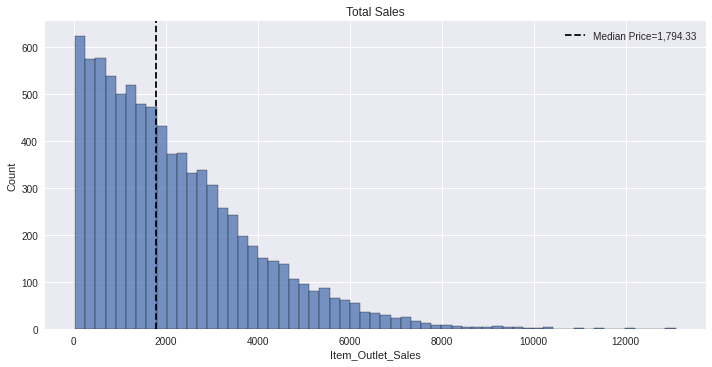

In [35]:
# graph of sales
g = sns.displot(data=df, x='Item_Outlet_Sales', aspect=2);

g.ax.set(title='Total Sales');

median = df['Item_Outlet_Sales'].median()
g.ax.axvline(median, color='black', linestyle='--',
            label=f"Median Price={median:,.2f}")

g.ax.legend();

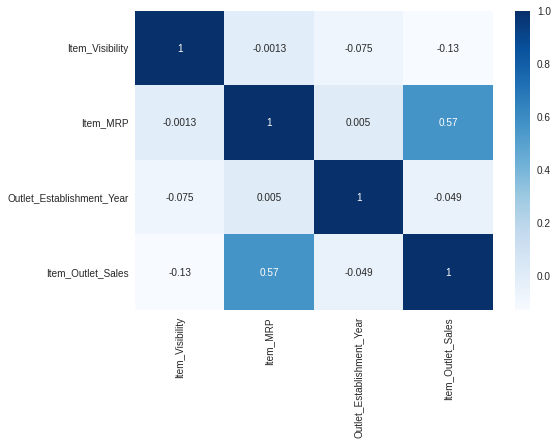

In [31]:
#general correlation trends
sns.heatmap(corr, cmap = 'Blues', annot = True);

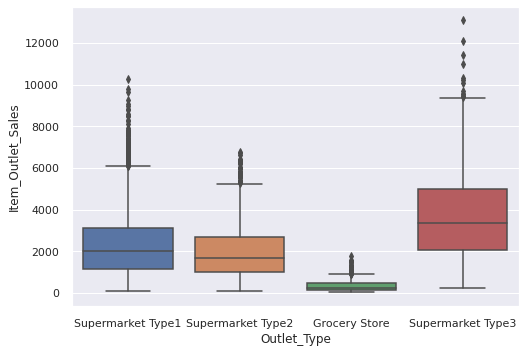

In [64]:
sns.boxplot(x = df['Outlet_Type'],
            y = df['Item_Outlet_Sales']);